# Aula 6 - Exercícios - Gráficos
### Consulta a internet (Google, Stackoverflow e etc) liberada!!

In [1]:
# Importe a biblioteca pandas
import pandas as pd
import seaborn as sns
sns.set() # Ajusta valor padrão de tema, escala e paleta de cor


### 6.2 Plote um gráfico que mostre a evolução ao longo do tempo dos dados de curetagem do Estado de São Paulo.
#### Pense em possíveis causas que possam explicar a aparência cíclica do gráfico. Se encontrar alguma explicação plausível, descreva ela logo após o seu gráfico.

#### Dica: Inspire-se no exercício quase igual a esse resolvido durante a aula 5. O que você precisa fazer a mais é filtrar os dados do Estado de São Paulo.

In [14]:
# Plote seu gráfico aqui
# path_curetagem='https://github.com/alexlopespereira/curso_ciencia_dados2020/raw/master/data/originais/curetagem/consolidado/curetagem2018.xlsx'
path_curetagem='../../curso_ciencia_dados2020/data/originais/curetagem/consolidado/curetagem2018.xlsx'

df = pd.read_excel(path_curetagem)
df.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,Total
0,35 São Paulo,2153,2800,2892,3000,3201,3008,3412,3395,3623,...,2968,2946,2756,2771,2520,2595,2476,2559,2365,359255
1,29 Bahia,1156,1640,1560,1722,1530,2089,1831,2267,2403,...,1505,1545,1418,1462,1192,1375,1363,1260,1245,204101
2,31 Minas Gerais,1193,1499,1601,1398,1534,1787,1639,1730,1751,...,1459,1333,1359,1260,1235,1413,1196,1158,1086,182772
3,33 Rio de Janeiro,679,816,1134,1072,1254,1243,1326,1475,1270,...,1350,1217,1085,1049,930,919,946,920,910,153270
4,26 Pernambuco,489,904,796,1142,903,877,886,1003,1008,...,795,778,831,738,647,749,693,716,666,106303


In [ ]:
df['Unidade da Federação'].value_counts()
df_sp = df.loc[df['Unidade da Federação'] == '35 São Paulo']

del df_sp['Unidade da Federação']
del df_sp['Total']

df_sp_melt = df_sp.melt(var_name='data', value_name='qtd_curetagem')

<AxesSubplot:xlabel='ano', ylabel='qtd_curetagem'>

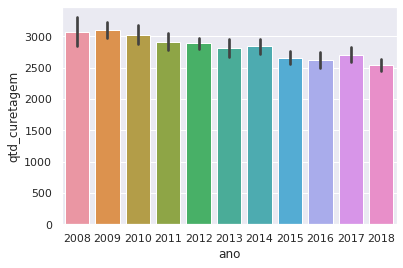

In [11]:
df_sp_melt['data'] = df_sp_melt.data.apply(lambda d: d[:4])
df_sp_melt
sns.barplot(x='ano', y='qtd_curetagem', data=df_sp_melt)

<AxesSubplot:xlabel='ano', ylabel='qtd_curetagem'>

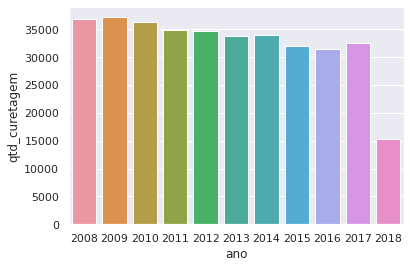

In [18]:
df_agg = df_sp_melt.groupby('ano').agg({'qtd_curetagem': 'sum'})
df_agg
sns.barplot(x=df_agg.index, y='qtd_curetagem', data=df_agg)